## 1. (30 puntos) Optimización de funciones

Para las siguientes funciones:

\begin{equation}
f_{1}(x,y)=xe^{(-x^{2}-y^{2})}
\end{equation}


1. Grafique tal función y distinga si las funciones son convexas o no, los puntos mínimos y regiones o puntos silla.

In [11]:
import math
import random
import torch
import sympy.core
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sympy import diff, symbols, parse_expr, E, sympify, latex
from torch.autograd import grad
from IPython.display import display, Markdown
%matplotlib inline

In [12]:
def f(x, y):
    return x * math.e ** (-x**2 - y**2)

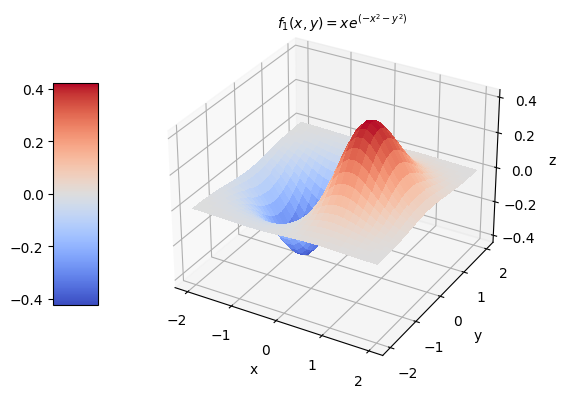

In [13]:
def plot_function():
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    plt.rcParams['legend.fontsize'] = 10
    linspace_x = torch.linspace(-2, 2, steps=30)
    linspace_y = torch.linspace(-2, 2, steps=30)
    X, Y = torch.meshgrid(linspace_x, linspace_y, indexing="xy")
    Z = f(X, Y)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.text2D(0.35, 0.95, r'$f_{1}(x,y)=xe^{(-x^{2}-y^{2})}$', transform=ax.transAxes)
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.6, aspect=5, location='left')
    plt.show()

plot_function()

- La función $f_{1}(x,y)=xe^{(-x^{2}-y^{2})}$ es no convexa.
- El punto mínimo se encuentra en la región azul, su valor en Z es aproximadamente $-0.4$.
- El punto máximo se encuentra en la región roja, su valor en Z es aproximadamente $0.4$.
- Los puntos silla de la función se encuentran fuera del rango $x,y \in [-2,2]$

2. (10 puntos) Implemente el algoritmo del descenso del gradiente con moméntum:

In [14]:
def gradient_descent_momentum(initial_position, epochs=5, momentum=0.1, alpha=0.05, epsilon=0.2, convergence=-0.42):
    agent = initial_position
    agent.requires_grad = True
    agents = [agent]
    inertia = 0
    for epoc in range(epochs):  #  range(epochs)
        function_eval = f(agent[:1], agent[1:])
        gradient = grad(function_eval, agent, create_graph=True)[0]
        agent = agent - ((momentum * inertia) + alpha * gradient)
        theta = agent.detach()
        agents.append(theta)
        if f(theta[:1], theta[1:]) <= convergence or torch.norm(gradient) < epsilon:
            break
        inertia = (momentum * inertia) + alpha * (1 - momentum) * gradient
    agents[0] = agents[0].detach()
    return agents

In [103]:
def plot(thetas, title):
    #  Contour plot
    linspace_x = torch.linspace(-2, 2, steps=30)
    linspace_y = torch.linspace(-2, 2, steps=30)
    X, Y = torch.meshgrid(linspace_x, linspace_y, indexing="xy")
    Z = f(X, Y)
    fig = plt.figure(figsize=plt.figaspect(0.4))
    ax = fig.add_subplot(1, 2, 1)
    cp = ax.contourf(X, Y, Z, cmap=cm.coolwarm)
    fig.colorbar(cp)  # Add a color bar to a plot
    ax.set_title(r'$f_{1}(x,y)=xe^{(-x^{2}-y^{2})}$')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    thetas = torch.stack(thetas)
    agents_x = thetas[:, 0]
    agents_y = thetas[:, 1]
    ax.scatter(agents_x, agents_y, s=40, lw=0, color='yellow', label=r'HELLO')
    plt.quiver(agents_x[:-1], agents_y[:-1], agents_x[1:]-agents_x[:-1], agents_y[1:]-agents_y[:-1], scale_units='xy', angles='xy', scale=1)

    #  3D plot
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    agents_z = f(agents_x, agents_y)
    ax.scatter(agents_x, agents_y, agents_z, s=80, lw=0, color='yellow', alpha=1)
    ax.plot_surface(X, Y, Z,  rstride=1, cstride=1, cmap=cm.coolwarm, edgecolor='none', alpha=0.4)
    ax.view_init(50, 100)
    ax.text2D(0.35, 0.95, r'$f_{1}(x,y)=xe^{(-x^{2}-y^{2})}$', transform=ax.transAxes)
    ax.quiver(agents_x[:-1], agents_y[:-1], agents_z[:-1], (agents_x[1:]-agents_x[:-1]), (agents_y[1:]-agents_y[:-1]), (agents_z[1:]-agents_z[:-1]), length=1, alpha=1)
    plt.show()

    #  Results
    thetas_list = ""  # "Initial: $\\theta_{0}=" + str(round(thetas[0][0].item(), 3)) + "," + str(round(thetas[0][1].item(), 3)) + "$ \n"
    for theta in range(len(thetas)):  # range(0, len(thetas))
        thetas_list += "epoch " + str(theta) + ": $\\theta_{" + str(theta) + "}=" + str(round(thetas[theta][0].item(), 3)) + "," + str(round(thetas[theta][1].item(), 3)) + "$ \n"
    minimums = ""
    for minimum in range(len(agents_z)):
        minimums += "$f(\\theta_{" + str(minimum) + "})=" + str(round(agents_z[minimum].item(), 3)) + "$ \n"

    plt.figure(figsize=(1, 0.1))
    plt.text(0.2, 1, title, ha='center', va='baseline', size=12)
    plt.axis('off')
    plt.show()
    plt.figure(figsize=(6, 0.1))
    plt.text(0, 1, thetas_list, ha='left', va='baseline', size=12)
    plt.text(1, 1, minimums, ha='left', va='baseline', size=12)
    plt.axis('off')
    plt.show()

a) Escoja un coeficiente de aprendizaje $\alpha$ que permita la convergencia y reporte los resultados para 10 corridas:

1) La tolerancia fijada para la convergencia en términos de la magnitud del gradiente.

2) La cantidad de iteraciones necesarias para converger.

3) El punto de convergencia.

4) Escoga una de las corridas y en una gráfica muestre los puntos probados (visitados) por el algoritmo.

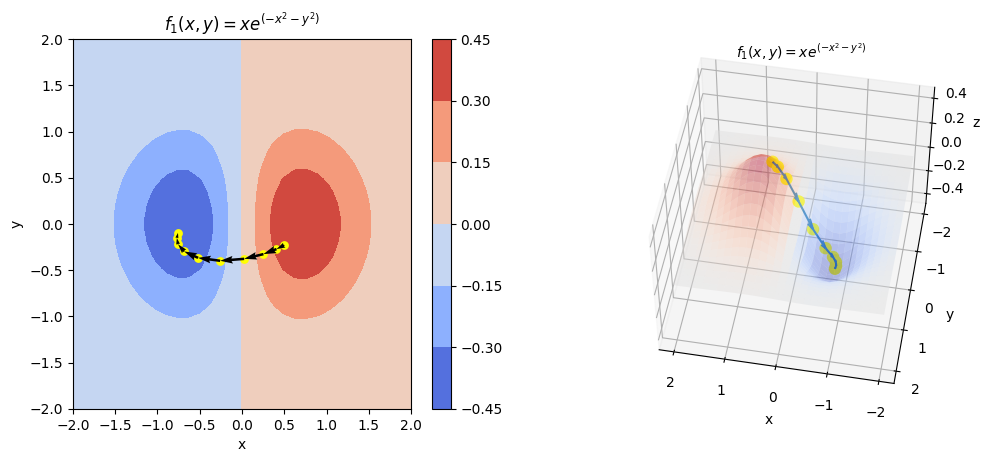

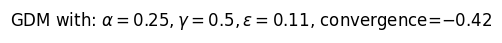

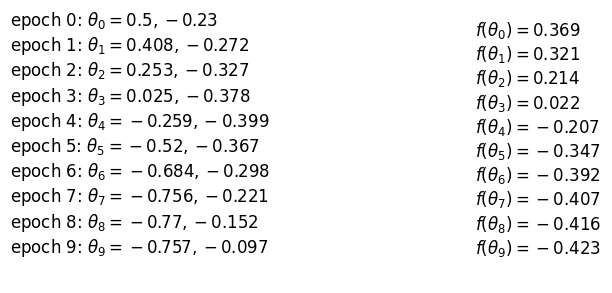

In [104]:
alpha = 0.25 # Learning rate alpha
gamma = 0.5 # Momentum coefficient
epsilon = 0.11  # Tolerance epsilon
convergence = -0.42 # Convergence point
epochs = 20 # Iteration epochs
runs = 10 # Runs
results = [] # Gradient descent results
# Title for plot
title = "GDM with: $\\alpha=" + str(alpha) + ", \\gamma=" + str(gamma) + ", \\epsilon=" + str(epsilon) + "$" + ", convergence=$" + str(convergence) + "$"

for run in range(runs):
    point_x = random.uniform(-1, 1)
    point_y = random.uniform(-1, 1)
    init_position = torch.Tensor([point_x, point_y])
    thetas = gradient_descent_momentum(init_position, epochs=epochs, alpha=alpha, momentum=gamma, epsilon=epsilon, convergence=convergence)
    results.append(thetas)

#  Randomly choose a run and plot
# run = random.randint(0, runs - 1)
# plot(results[run], "Run #" + str(run) + " | " + title)

#  Example execution:
init_position = torch.Tensor([0.5, -0.23])
thetas = gradient_descent_momentum(init_position, epochs=epochs, alpha=alpha, momentum=gamma, epsilon=epsilon, convergence=convergence)
plot(thetas, title)

b) Escoja un $\alpha$ relativamente grande respecto al valor seleccionado. ¿Qué sucede? ¿Permite un $\alpha$ muy grande la convergencia?

Para esta superficie, con los parámetros default programados y un punto inicial cercano a los rangos en $Y = [0.5, -0.5]$ y en $X = [-1.0, 0.5]$, el algoritmo permite un $\alpha$ muy grande. Al probar con varios valores de $\alpha$, se llegó a que un $\alpha$ de $1.2$ es lo suficientemente grande para una ejecución estable respetando los rangos y otros parámetros anteriormente mencionados. En el ejemplo abajo se puede observar una ejecución con un valor de $\alpha=1.2$.
Con un $\alpha$ elevado, el algoritmo llega más rápido al mínimo, sin embargo, corre el riesgo de avanzar de más y omitir el mínimo dependiendo de los otros parámetros del algoritmo y el punto inicial.
En este caso, se permite un $\alpha$ grande para la convergencia, se llega mucho más rápido al punto de convergencia default, sin importar donde se ubique el punto inicial según los parámetros y los rangos indicados anteriormente.

c) ¿Qué sucede si escoge un $\alpha$ muy pequeño?

Para esta superficie con un $\alpha$ pequeño, al compararlo con un alpha grande, se llega al mínimo en una cantidad mayor de epochs. Véase por ejemplo una ejecución con un $\alpha$ de $0.05$, punto inicial $x=0.5, y=-0.23$ y otros parámetros default, fue necesario 32 epochs para llegar a un mínimo de $-0.42$, en cambio con un $\alpha$ de $0.8$ se llegó a un mínimo de $-0.428$ en 5 epochs. A pesar de esto, al usar un $\alpha$ pequeño, se sigue una ruta más segura hacia el mínimo en lugar de un $\alpha$ grande que lo puede llegar a omitir.


d) ¿Cómo puede el algoritmo de descenso de gradiente evitar quedar atrapado en mínimos locales o puntos silla?

Se puede utilizar un coeficiente de momentum grande, puede ser que llegue cerca de un mínimo local o punto silla pero el momentum lo saca de ahí y lo hace buscar otros mínimos menores en donde no se quede atascado. Del mismo modo, también depende en donde se encuentre el punto inicial, por ejemplo, con esta superficie, si el mismo se encuentra en una posición $x > 1.2$ nunca llegará al mínimo sin importar los valores de los otros parámetros.

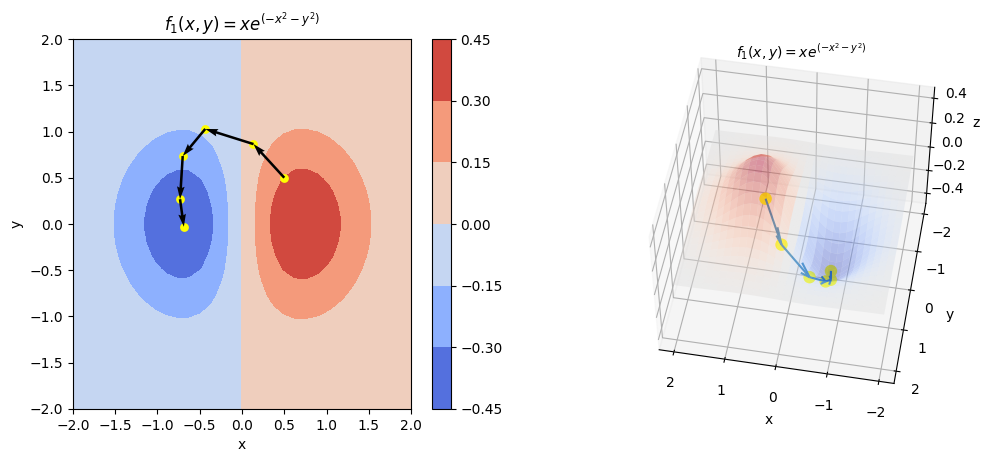

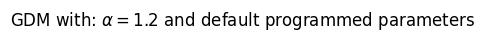

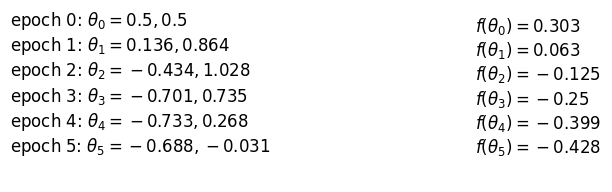

In [105]:
#  Point B
alpha = 1.2
init_position = torch.Tensor([0.5, 0.5])
thetas = gradient_descent_momentum(init_position, alpha=alpha)
title = "GDM with: $\\alpha=" + str(alpha) + "$ and default programmed parameters"
plot(thetas, title)

3. (20 puntos) Implemente el algoritmo de Newton-Raphson:

In [106]:
# Code to generate the visual representation of the hessian matrix of any function.
# This is used for visual purposes only !!

def visual_function(expression: str = ""):
    if not expression:
        x = symbols('x')
        y = symbols('y')
        return x * E ** (-x**2 - y**2)
    return parse_expr(expression)


def visual_hessian_matrix(expression: sympy.core.Expr, variables: list = None):
    if variables is None:
        variables = ["x", "y"]
    hess_matrix = np.empty((len(variables), len(variables)), dtype=sympy.core.Expr)
    matrix_col_row = 0
    derivatives = []
    for variable in variables:
        print("Building column #" + str(matrix_col_row + 1) + " and row #" + str(matrix_col_row + 1))
        first_derivative = sympify(diff(expression, variable))
        der = "df/d" + variable + "=" + str(first_derivative)
        derivatives.append(der)
        print(der)
        variable_index = variables.index(variable)
        column = []
        for second_variable in variables[variable_index:]:
            second_derivative = sympify(diff(first_derivative, second_variable))
            der = "df/d" + second_variable + "d" + variable + "=" + str(second_derivative)
            derivatives.append(der)
            print(der)
            column.append(second_derivative)
        hess_matrix[matrix_col_row:, matrix_col_row] = column
        row = []
        for second_variable in variables[variable_index+1:]:
            derivative_second_var = sympify(diff(expression, second_variable))
            der = "df/d" + second_variable + "=" + str(derivative_second_var)
            derivatives.append(der)
            print(der)
            second_derivative = sympify(diff(derivative_second_var, variable))
            der = "df/d" + variable + "d" + second_variable + "=" + str(second_derivative)
            derivatives.append(der)
            print(der)
            row.append(second_derivative)
        hess_matrix[matrix_col_row, matrix_col_row + 1:] = row
        matrix_col_row += 1
    return hess_matrix, derivatives


def derivatives_to_latex(derivatives):
    latex_derivatives = []
    for der in derivatives:
        start = "$" + der[0: der.find("=")]
        func = sympify(der[der.find("=") + 1:])
        latex_derivative = start + "=" + latex(func) + "$\n"
        latex_derivatives.append(latex_derivative)
    return latex_derivatives


def matrix_to_latex(matrix):
    latex_matrix = r'$H=\begin{pmatrix}'
    for row in matrix:
        element_latex = ""
        for element in row:
            element_latex += latex(element) + " & "
        element_latex = element_latex[:len(element_latex) - 3] + r'\\'
        latex_matrix += element_latex
    latex_matrix += r'\end{pmatrix}$'
    return latex_matrix

In [107]:
# Newton-Raphson implementation

def hessian_matrix(gradient, agent, visualize=True):
    if visualize:
        print(f"First Derivative: {gradient}")
    dimensions = agent.shape[0]
    hess_matrix = torch.zeros(dimensions, dimensions)
    for dimension in range(dimensions):
        second_derivative = grad(gradient[dimension], agent, create_graph=True)[0]
        if visualize:
            print(f"Second derivative on dimension {dimension}: {second_derivative}")
        hess_matrix[dimension:] = second_derivative
    if visualize:
        print(f"\nHessian Matrix: {hess_matrix}")
    return hess_matrix

# TODO Aplicar determinante de la Hessiana
def newton_raphson(initial_position, function, epochs=5, visualize=True, damping_factor=0.4, run_with_fix=True):  # To deactivate damping_factor use 1
    agent = initial_position
    agent.requires_grad = True
    dimension = agent.shape[0]
    agents = [agent]
    latex_h_matrix = ""
    all_derivatives = []
    if visualize:
        h_matrix, all_derivatives = visual_hessian_matrix(visual_function())
        all_derivatives = derivatives_to_latex(all_derivatives)
        latex_h_matrix = matrix_to_latex(h_matrix)
        print(f"Hessian Matrix: {h_matrix}" + "\n")
        print(f"Hessian Matrix in Latex: {latex_h_matrix}\n")
    for epoch in range(epochs):
        if visualize:
            print("---------epoch-" + str(epoch) + "-------------\n")
            print(f"Agent: {agent}\n")
        function_eval = function(agent[:1], agent[1:])
        gradient = grad(function_eval, agent, create_graph=True)[0]
        inverse_hess_matrix = torch.nan_to_num(torch.inverse(hessian_matrix(gradient, agent, visualize=visualize)))
        if visualize:
            print(f"Inverse Hessian Matrix: {inverse_hess_matrix}")
        hess_gradient = (torch.mm(inverse_hess_matrix, gradient.view(gradient.shape[0], 1)))
        if visualize:
            print(f"Gradient: {hess_gradient}\n")
        new_agent = agent.view(agent.shape[0], 1) - damping_factor * hess_gradient
        new_agent = new_agent.view(dimension)
        if function(new_agent[:1], new_agent[1:]) > function_eval and run_with_fix:  # If it goes up then force it to go down
            agent = agent.view(agent.shape[0], 1) - damping_factor * torch.abs(hess_gradient)
        else:
            agent = new_agent
        agent = agent.view(dimension)
        theta = agent.detach()
        agents.append(theta)
        if visualize:
            print(f"New agent: {theta}\n")
    agents[0] = agents[0].detach()
    return agents, latex_h_matrix, all_derivatives

In [108]:
init_position = torch.Tensor([0.5, 0.2]) # torch.Tensor([0.5, 0.1])
epochs = 6
damping_factor = 0.4
run_with_fix = True

thetas, latex_hess_matrix, visual_derivatives = newton_raphson(init_position, f, epochs=epochs, damping_factor=damping_factor, run_with_fix=run_with_fix)

Building column #1 and row #1
df/dx=-2*x**2*exp(-x**2 - y**2) + exp(-x**2 - y**2)
df/dxdx=4*x**3*exp(-x**2 - y**2) - 6*x*exp(-x**2 - y**2)
df/dydx=4*x**2*y*exp(-x**2 - y**2) - 2*y*exp(-x**2 - y**2)
df/dy=-2*x*y*exp(-x**2 - y**2)
df/dxdy=4*x**2*y*exp(-x**2 - y**2) - 2*y*exp(-x**2 - y**2)
Building column #2 and row #2
df/dy=-2*x*y*exp(-x**2 - y**2)
df/dydy=4*x*y**2*exp(-x**2 - y**2) - 2*x*exp(-x**2 - y**2)
Hessian Matrix: [[4*x**3*exp(-x**2 - y**2) - 6*x*exp(-x**2 - y**2)
  4*x**2*y*exp(-x**2 - y**2) - 2*y*exp(-x**2 - y**2)]
 [4*x**2*y*exp(-x**2 - y**2) - 2*y*exp(-x**2 - y**2)
  4*x*y**2*exp(-x**2 - y**2) - 2*x*exp(-x**2 - y**2)]]

Hessian Matrix in Latex: $H=\begin{pmatrix}4 x^{3} e^{- x^{2} - y^{2}} - 6 x e^{- x^{2} - y^{2}} & 4 x^{2} y e^{- x^{2} - y^{2}} - 2 y e^{- x^{2} - y^{2}}\\4 x^{2} y e^{- x^{2} - y^{2}} - 2 y e^{- x^{2} - y^{2}} & 4 x y^{2} e^{- x^{2} - y^{2}} - 2 x e^{- x^{2} - y^{2}}\\\end{pmatrix}$

---------epoch-0-------------

Agent: tensor([0.5000, 0.2000], requires_gra

Hessian Matrix construction: 

$df/dx=- 2 x^{2} e^{- x^{2} - y^{2}} + e^{- x^{2} - y^{2}}$


$df/dxdx=4 x^{3} e^{- x^{2} - y^{2}} - 6 x e^{- x^{2} - y^{2}}$


$df/dydx=4 x^{2} y e^{- x^{2} - y^{2}} - 2 y e^{- x^{2} - y^{2}}$


$df/dy=- 2 x y e^{- x^{2} - y^{2}}$


$df/dxdy=4 x^{2} y e^{- x^{2} - y^{2}} - 2 y e^{- x^{2} - y^{2}}$


$df/dy=- 2 x y e^{- x^{2} - y^{2}}$


$df/dydy=4 x y^{2} e^{- x^{2} - y^{2}} - 2 x e^{- x^{2} - y^{2}}$


$H=\begin{pmatrix}4 x^{3} e^{- x^{2} - y^{2}} - 6 x e^{- x^{2} - y^{2}} & 4 x^{2} y e^{- x^{2} - y^{2}} - 2 y e^{- x^{2} - y^{2}}\\4 x^{2} y e^{- x^{2} - y^{2}} - 2 y e^{- x^{2} - y^{2}} & 4 x y^{2} e^{- x^{2} - y^{2}} - 2 x e^{- x^{2} - y^{2}}\\\end{pmatrix}$

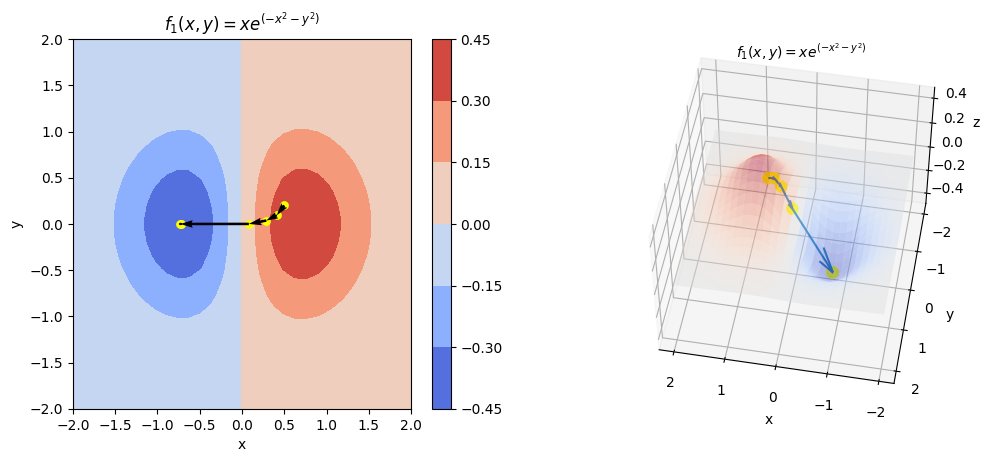

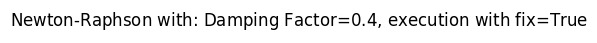

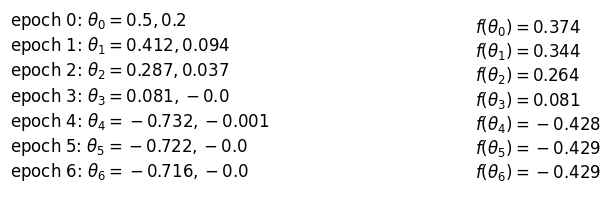

In [109]:
# Visualization of Hessian Matrix - Rerun if not being shown !!!!
display(Markdown("Hessian Matrix construction: "))
for visual_derivative in visual_derivatives:
    display(Markdown(visual_derivative))
display(Markdown(latex_hess_matrix))

# Plot Newton-Raphson
title = "Newton-Raphson with: Damping Factor=$" + str(damping_factor) + "$, execution with fix=" + str(run_with_fix)
plot(thetas, title)
# LO QUE HACE ES buscar puntos estables !!